# Project Introduction and Questions


### Research Questions (Q):

1. Which genres are the most common (# of movies made)?
2. Which genres have the high avg. budget and revenue?
2.5 Which genres have the high avg. profit?
3. Which genres have high avg. popularity?
4. Which genres have the highest number of movies with a voting avg >= 8?
5. What is the profit per genre by year? Which have become increasingly more profitable over time?


### Research Hypotheses (H):

1. The best movies according to vote avg. return high profit and revenue
2. The best movies according to popularity return high revenue
3. Highly budgeted movies return high profit
4. Highly budgeted movies have a high popularity

In [4]:
# This project is using a dataset from IMDB of movies from 1960 to 2015

In [38]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
movies = pd.read_csv(r'/Users/matthewrobinson/Desktop/Coding and Certificates/Analyst Builder/Pandas Course/imdb_movies.csv')

movies

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [16]:
pd.set_option('display.max.rows', 11000)
pd.set_option('display.max.columns', 22)

In [18]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [30]:
# cleaned duplicates and removed 23 rows of data with NULL values for the genre

movies.drop_duplicates(inplace = True)
movies.dropna(subset = ['genres'], inplace = True)

In [32]:
# created profit column for later analysis
movies['profit'] = movies['revenue'] - movies['budget']

In [36]:
movies_genre = movies[['popularity', 'budget', 'revenue', 'original_title', 'runtime', 'genres', 'release_date', 'vote_count', 'vote_average', 'profit']]

movies_genre.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,1316249360


In [40]:
# split out the genres for use in analysis

split = movies_genre['genres'].str.split('|').apply(Series, 1).stack()
split.index = split.index.droplevel(-1)
split.name = 'genres_split'
del movies_genre['genres']
movies_genre = movies_genre.join(split)

movies_genre.head()

/var/folders/jx/xf1054g51_s7m2s0t_3l8myh0000gn/T/ipykernel_11397/3728561734.py:3: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  split = movies_genre['genres'].str.split('|').apply(Series, 1).stack()


,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.1,228436354,Action


### Research Questions (Q):

1. Which genres are the most common (number of movies made)?

In [51]:
movies_common = movies_genre.groupby('genres_split')['original_title'].count().sort_values(ascending = True).reset_index()
genres_count = pd.DataFrame(movies_common)
genres_count = genres_count.set_index('genres_split')
genres_count

,original_title
genres_split,
Western,165
TV Movie,167
Foreign,188
War,270
History,334
Music,408
Documentary,520
Animation,699
Mystery,810


<Axes: title={'center': 'Movies Per Genre in %'}, ylabel='original_title'>

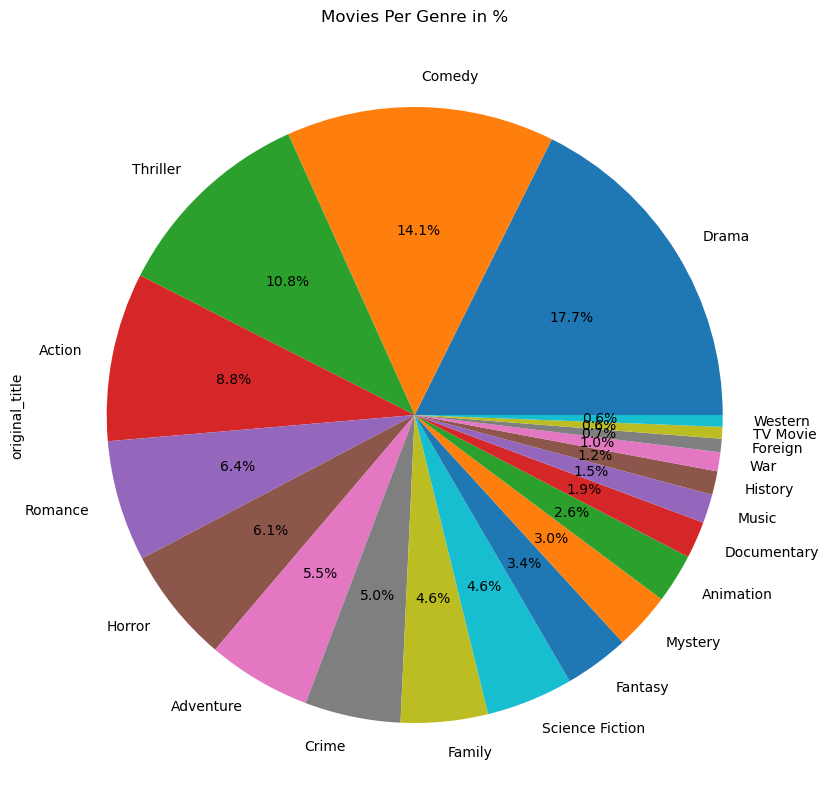

In [47]:
genres_count['original_title'].plot.pie(title = 'Movies Per Genre in %', autopct = '%1.1f%%', figsize = (10, 10))

<Axes: title={'center': 'Movies per Genre'}, ylabel='genres_split'>

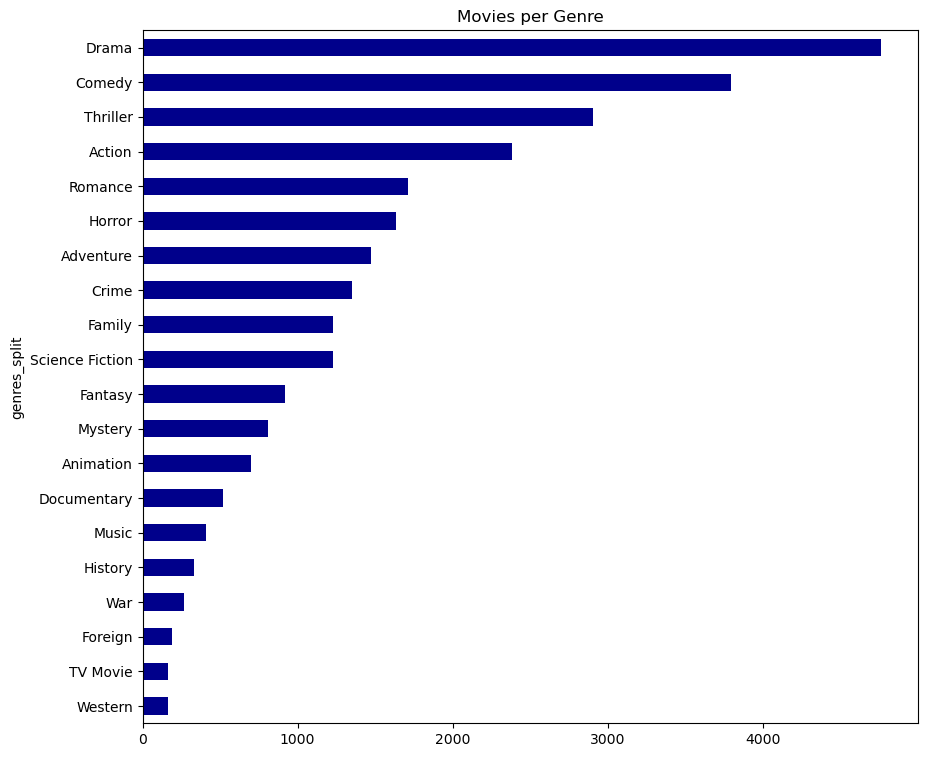

In [53]:
genres_count['original_title'].plot.barh(title = 'Movies per Genre', color = 'DarkBlue', figsize = (10,9))

### Research Questions (Q):

2. Which genres have the high avg. budget and revenue?

In [63]:
genres_avg = movies_genre.groupby('genres_split').mean(numeric_only = True)
pd.options.display.float_format = '{:2f}'.format
genres_avg.head()

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
genres_split,,,,,,,
Action,0.926274,27727820.331376,72794732.002517,104.917785,392.993708,5.787752,45066911.671141
Adventure,1.154259,37543694.530931,113137861.069341,106.173351,513.125085,5.940585,75594166.538409
Animation,0.852182,23159781.606581,75256062.223176,68.181688,303.000000,6.403147,52096280.616595
Comedy,0.592607,13297915.618244,37526242.072238,96.745057,176.436330,5.905167,24228326.453994
Crime,0.744930,17663801.124815,42368661.645495,106.917282,278.805022,6.124889,24704860.520679


<Axes: title={'center': 'Budget and Revenue by Genre'}, ylabel='genres_split'>

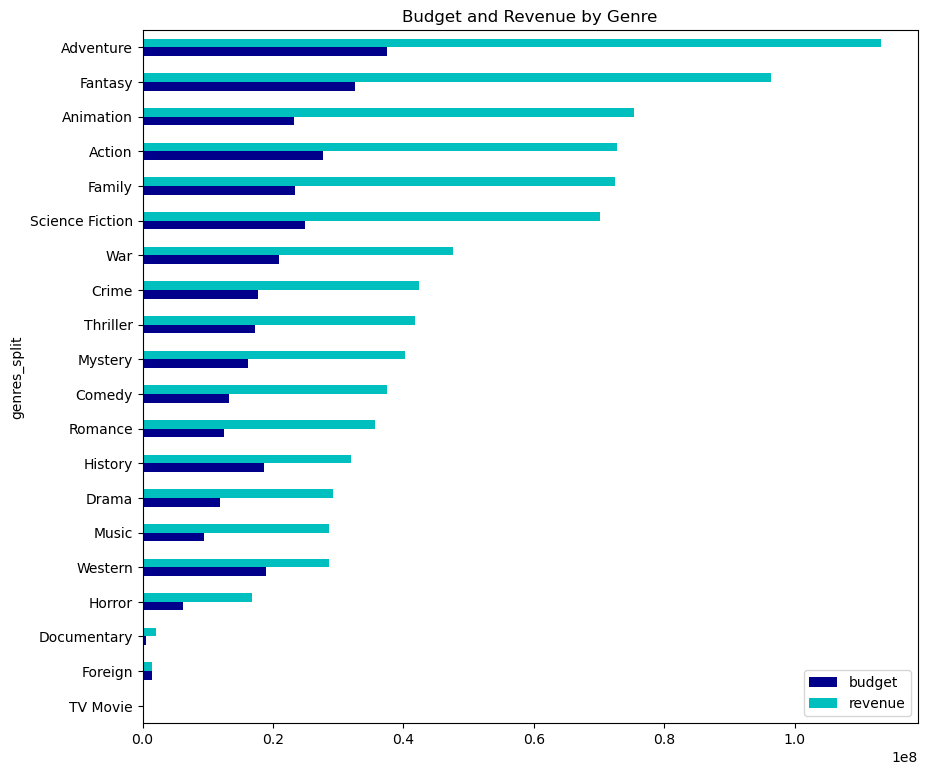

In [65]:
genres_avg.sort_values('revenue', ascending = True, inplace = True)

genres_avg[['budget', 'revenue']].plot.barh(title = 'Budget and Revenue by Genre', color = ('DarkBlue', 'c'), figsize = (10,9))

### Research Questions (Q):

2.5 Which genres have the high avg. profit?

<Axes: title={'center': 'Profit by Genre'}, ylabel='genres_split'>

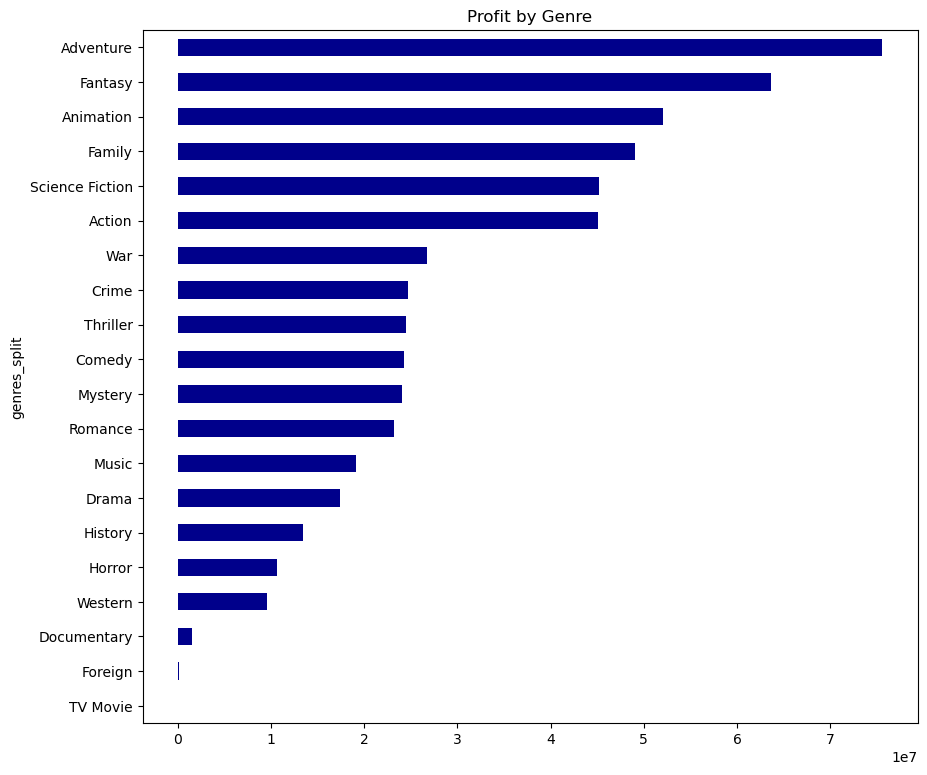

In [68]:
genres_avg.sort_values('profit', ascending = True, inplace = True)
genres_avg['profit'].plot.barh(title = 'Profit by Genre', color = 'DarkBlue', figsize = (10,9))

### Research Questions (Q):

3. Which genres have high avg. popularity?

<Axes: title={'center': 'Popularity by Genre'}, ylabel='genres_split'>

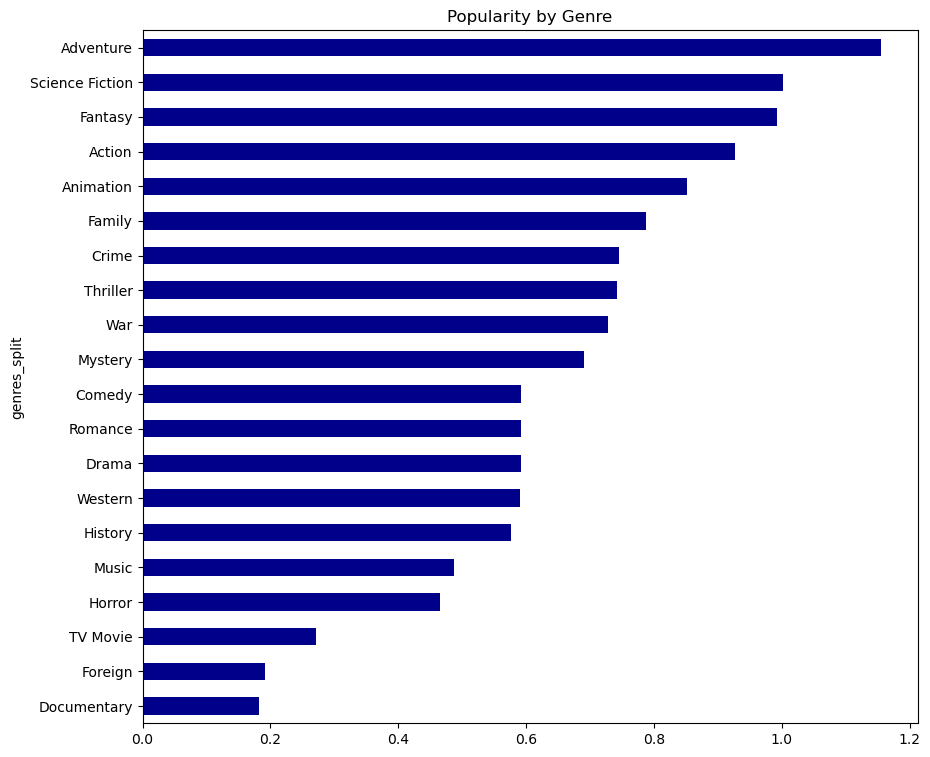

In [71]:
genres_avg.sort_values('popularity', ascending = True, inplace = True)

genres_avg['popularity'].plot.barh(title = 'Popularity by Genre', color = 'DarkBlue', figsize = (10,9))

### Research Questions (Q):

4. Which genres have the highest number of movies with a voting avg >= 8?

In [76]:
vote_twenty = movies_genre[(movies_genre['vote_count'] >= 20) & (movies_genre['vote_average'] >= 8)]

genres_vote = vote_twenty.groupby('genres_split')['vote_average'].count().reset_index()

genres_vote.set_index('genres_split', inplace = True)

genres_vote.sort_values(by = 'vote_average', inplace = True)

<Axes: title={'center': 'Most Highly Rated Genres - Rating 8 and Above'}, ylabel='genres_split'>

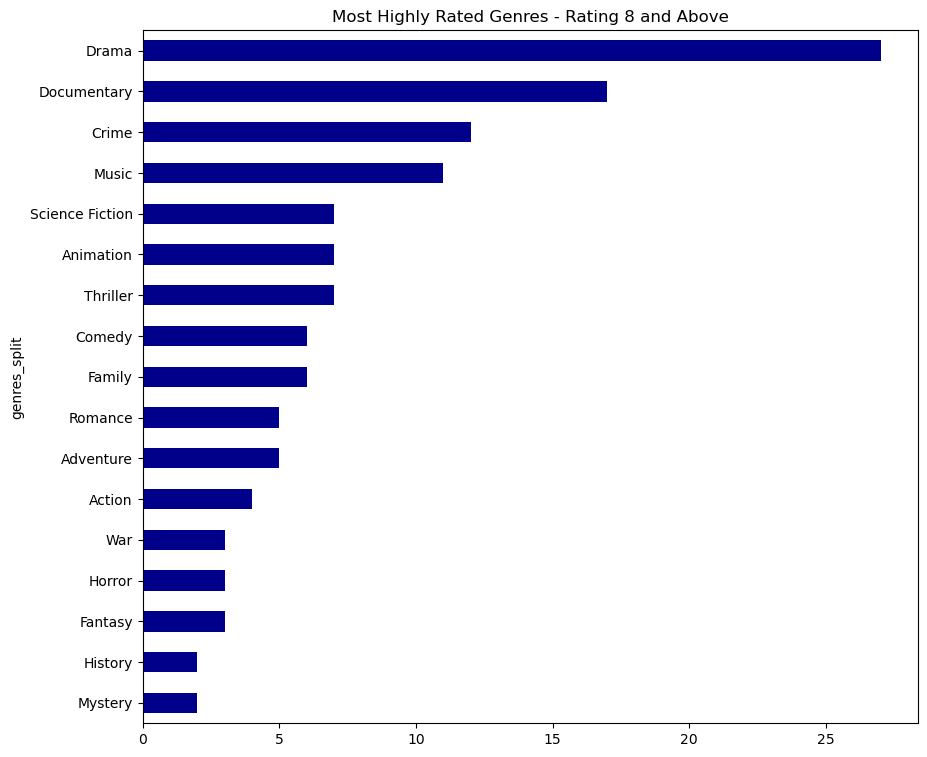

In [78]:
genres_vote['vote_average'].plot.barh(title = 'Most Highly Rated Genres - Rating 8 and Above', color = 'DarkBlue', figsize = (10,9))

### Research Questions (Q):

5. What is Profit per Genre per Year?

In [84]:
movies_genre_year = movies[['popularity', 'budget', 'revenue', 'original_title', 'runtime', 'genres', 'release_year', 'vote_count', 'vote_average', 'profit']]

movies_genre_year.head()

,popularity,budget,revenue,original_title,runtime,genres,release_year,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015,5562,6.500000,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015,6185,7.100000,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015,2480,6.300000,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015,5292,7.500000,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015,2947,7.300000,1316249360


In [86]:
split = movies_genre_year['genres'].str.split('|').apply(Series, 1).stack()
split.index = split.index.droplevel(-1)
split.name = 'genres_split'
del movies_genre_year['genres']
movies_genre_year = movies_genre_year.join(split)

movies_genre_year.head()

/var/folders/jx/xf1054g51_s7m2s0t_3l8myh0000gn/T/ipykernel_11397/3122137542.py:1: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  split = movies_genre_year['genres'].str.split('|').apply(Series, 1).stack()


,popularity,budget,revenue,original_title,runtime,release_year,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,2015,6185,7.100000,228436354,Action


In [88]:
year_genre = pd.DataFrame(movies_genre_year.groupby(['release_year', 'genres_split'])['profit'].mean())
yearly_genre_profit = pd.pivot_table(year_genre, values = 'profit', index = ['genres_split'], columns = ['release_year'])

yearly_genre_profit.head()

release_year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
genres_split,,,,,,,,,,,,,,,,,,,,,,,
Action,6363125.000000,2457142.857143,10437500.000000,14999691.250000,24280000.000000,16104504.777778,324785.714286,21732786.428571,8868478.833333,5861449.300000,7735913.454545,...,32379154.185714,38048623.212500,45977444.052632,47642764.404040,57555510.740741,34571030.355140,51968078.252174,71910257.424242,47431725.628099,69943650.015504,90399046.747664
Adventure,431000.000000,39130002.333333,21214285.714286,9428395.000000,24123400.000000,25124276.333333,791563.636364,49281873.857143,15122159.400000,16651809.400000,11406377.666667,...,70756754.320755,64895200.090909,83916731.083333,55016526.809524,113364919.736111,98125646.677966,113343224.564516,162549574.300000,100638113.402985,120373306.985075,144787868.971014
Animation,NaN,211880014.000000,NaN,0.000000,0.000000,0.000000,-105000.000000,100921706.000000,0.000000,0.000000,25837628.500000,...,40307312.153846,39047734.974359,67147670.531250,51907242.575758,48862898.250000,58455658.640000,63420098.934783,69231546.875000,93718795.261905,64313463.250000,83691174.384615
Comedy,5258750.000000,22198001.400000,1599974.800000,765591.923077,7080111.375000,3264285.714286,-149550.000000,10135087.470588,-1277777.777778,-125000.000000,11901488.583333,...,22147617.440559,24944308.174194,30674848.549669,21483012.426036,24741982.808081,23154807.875740,27241358.720930,25631999.136364,25068455.091429,26648786.864865,33703819.067901
Crime,0.000000,18828411.000000,3709948.666667,369526.750000,1723307.300000,-22500.000000,-275560.000000,12899678.714286,6762174.600000,31482963.000000,-2125000.000000,...,15680793.688889,21551432.962264,16700048.400000,31258696.854839,11016642.307692,13490412.320000,25395271.625000,29522925.555556,23248589.507042,5903014.230769,61286524.372549


Text(0.5, 1.0, 'Genres by Profit per Year')

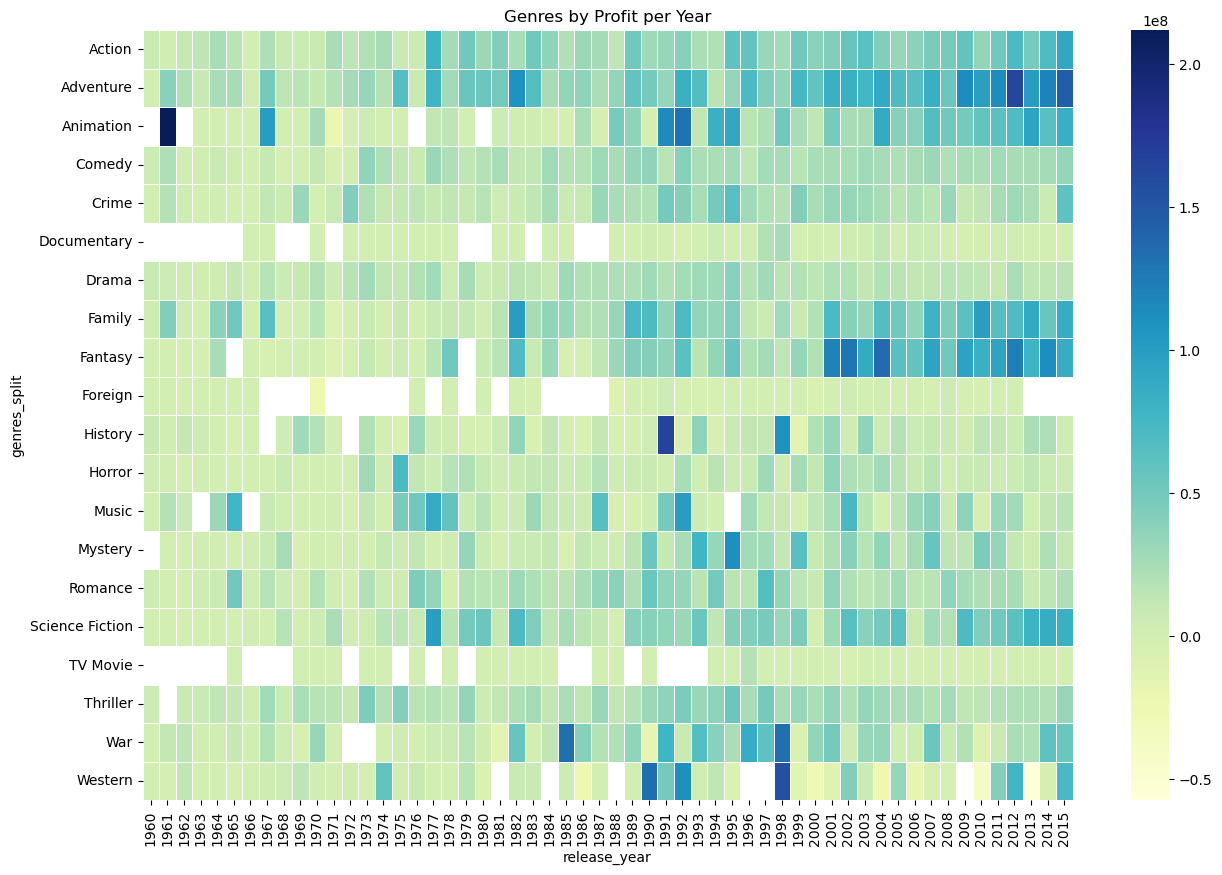

In [90]:
plt.figure(figsize = (15,10))

sns.heatmap(yearly_genre_profit, cmap = 'YlGnBu', linewidths = .5)

plt.title('Genres by Profit per Year')

### Research Hypotheses (H):
1. The best movies according to vote avg. return high profit and revenue

In [93]:
movies_genre2 = movies[['popularity', 'budget', 'revenue', 'original_title', 'runtime', 'genres', 'release_date', 'vote_count', 'vote_average', 'profit']]

In [95]:
movies_counted = movies_genre2[movies_genre2['vote_count'] > 20]

movies_counted.corr(method = 'spearman', numeric_only = True)

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.000000,0.554084,0.624088,0.238533,0.786868,0.152527,0.449108
budget,0.554084,1.000000,0.720928,0.342278,0.608789,0.017929,0.233401
revenue,0.624088,0.720928,1.000000,0.341440,0.699949,0.153775,0.744628
runtime,0.238533,0.342278,0.341440,1.000000,0.248899,0.273300,0.185926
vote_count,0.786868,0.608789,0.699949,0.248899,1.000000,0.255433,0.516716
vote_average,0.152527,0.017929,0.153775,0.273300,0.255433,1.000000,0.224793
profit,0.449108,0.233401,0.744628,0.185926,0.516716,0.224793,1.000000


Text(0.5, 1.0, 'Vote Average and Profit')

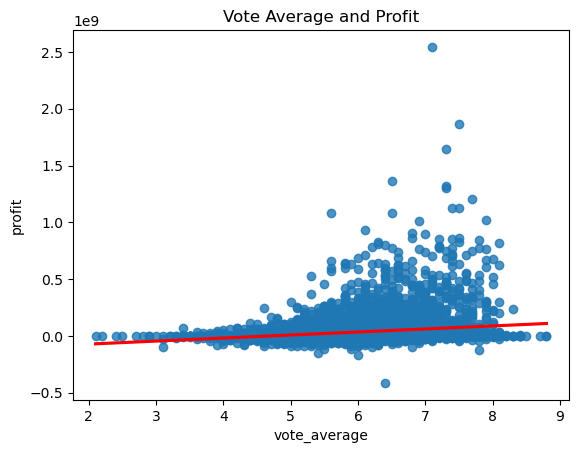

In [110]:
sns.regplot(data = movies_counted, x = 'vote_average', y = 'profit', line_kws = {'color': 'red'})

plt.title('Vote Average and Profit')

Text(0.5, 1.0, 'Vote Average and Revenue')

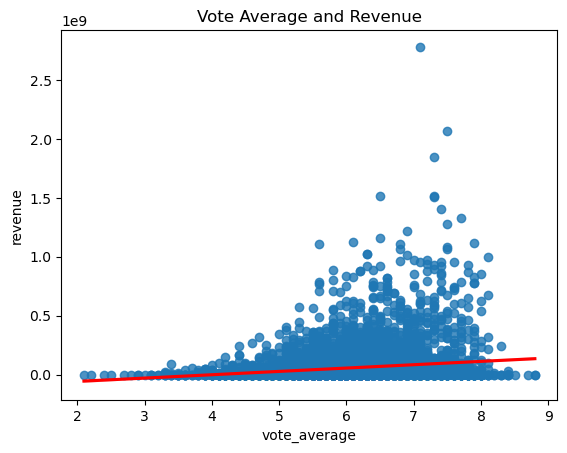

In [112]:
sns.regplot(data = movies_counted, x = 'vote_average', y = 'revenue', line_kws = {'color': 'red'})

plt.title('Vote Average and Revenue')

### Research Hypotheses (H):
2. The best movies according to popularity return high revenue

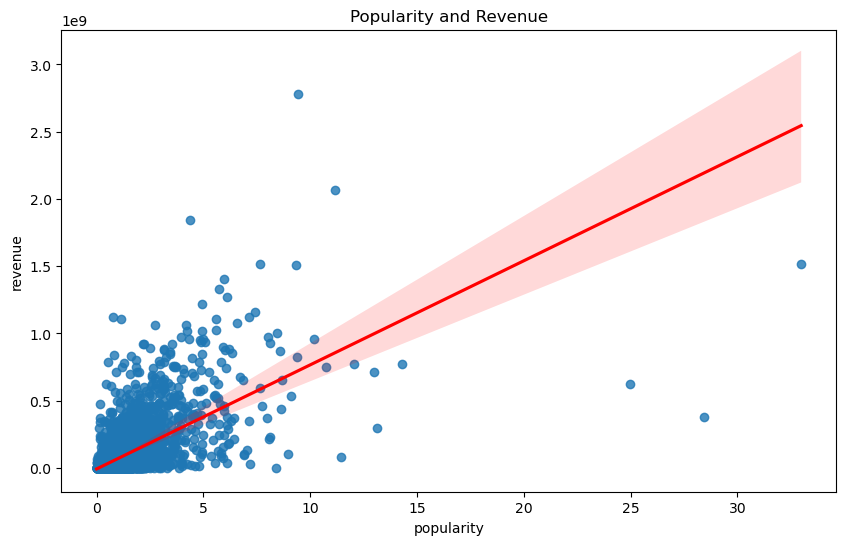

In [114]:
plt.figure(figsize = (10, 6))

sns.regplot(data = movies_counted, x = 'popularity', y = 'revenue', line_kws = {'color': 'red'})

plt.title('Popularity and Revenue')

plt.show()

### Research Hypotheses (H):
3. Highly budgeted movies return high profit

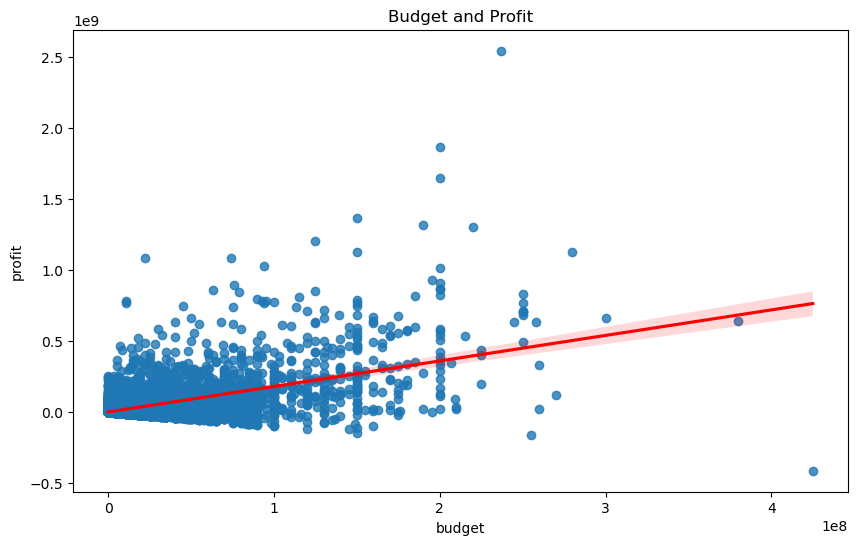

In [117]:
plt.figure(figsize = (10, 6))

sns.regplot(data = movies_counted, x = 'budget', y = 'profit', line_kws = {'color': 'red'})

plt.title('Budget and Profit')

plt.show()

### Research Hypotheses (H):
4. Highly budgeted movies have a high popularity

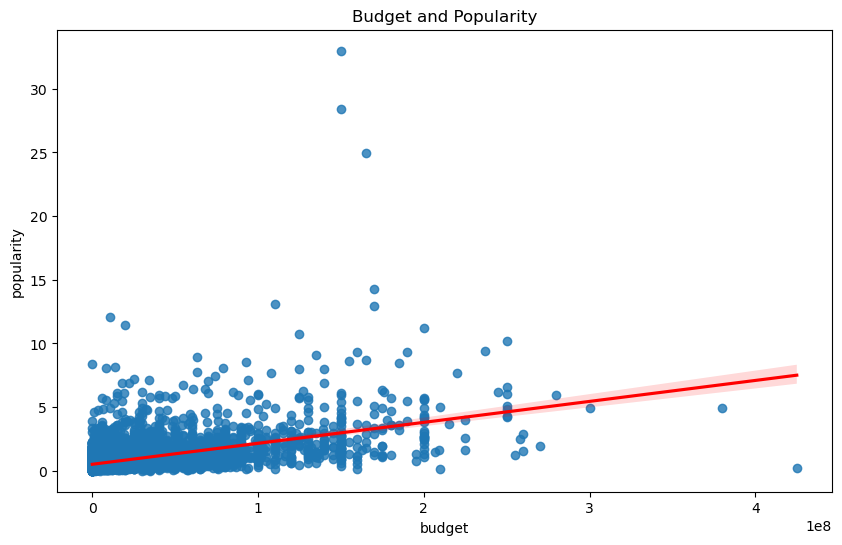

In [119]:
plt.figure(figsize = (10, 6))

sns.regplot(data = movies_counted, x = 'budget', y = 'popularity', line_kws = {'color': 'red'})

plt.title('Budget and Popularity')

plt.show()

# Notable Findings (based on this dataset)
1. Higher budgets tend to lead to more popularity and profit
2. Action, Adventure, Family, Fantasy, and Science Fiction have become more profitable over time
3. The most popular genre is Adventure, whereas Drama is the most highest vote ratings
4. Adventure has the highest budget and revenue